Error e_4 (area of misclassified region): 0.1725


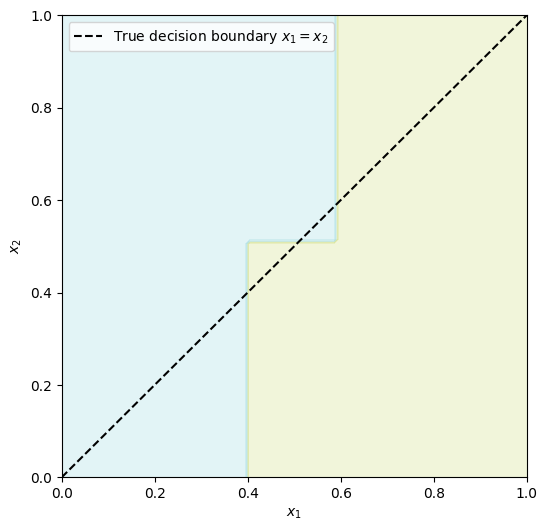

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap

# Step 1: Define the function f* (true decision boundary along x1 = x2)
def true_function(X):
    return np.where(X[:, 0] > X[:, 1], -1, 1)

# Step 2: Generate the data points for training
n_samples = 100000
X = np.random.rand(n_samples, 2)  # Points in [0, 1] x [0, 1]
y = true_function(X)

# Step 3: Train a decision tree with depth 4
tree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree.fit(X, y)

# Step 4: Visualize the decision tree regions
def plot_decision_boundary(clf, X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    # Create a mesh grid for visualization
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#d1e086', '#a1dce2']))
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Plot the true decision boundary for reference
    ax.plot([0, 1], [0, 1], 'k--', label='True decision boundary $x_1 = x_2$')
    ax.legend()

# Step 5: Compute the error e_d (misclassified region)
def compute_error(clf, n_samples=100000):
    X_test = np.random.rand(n_samples, 2)
    y_true = true_function(X_test)
    y_pred = clf.predict(X_test)
    misclassified = np.sum(y_pred != y_true)
    error = misclassified / n_samples
    return error

# Plot the regions and decision tree approximation
fig, ax = plt.subplots(figsize=(6, 6))
plot_decision_boundary(tree, X, y, ax)

# Step 6: Calculate and print the error
e_4 = compute_error(tree)
print(f"Error e_4 (area of misclassified region): {e_4:.4f}")
plt.savefig('decision_tree_db.pdf')
plt.show()


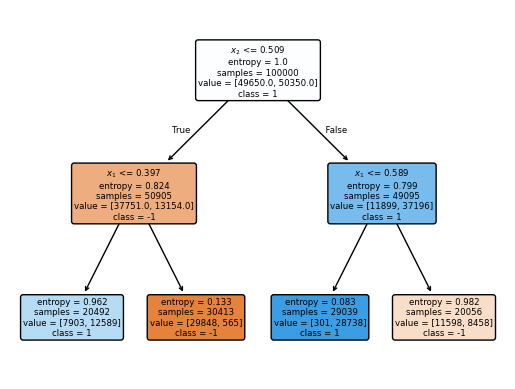

In [20]:
plot_tree(tree, filled=True, feature_names=['$x_1$', '$x_2$'], 
          rounded=True, class_names=['-1', '1'])
plt.savefig('decision_tree.pdf')
plt.show()
